In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #note use of statsmodels.api

In [6]:
handle = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/Advertising.csv"

In [7]:
data = pd.read_csv(handle, index_col = 0)

In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


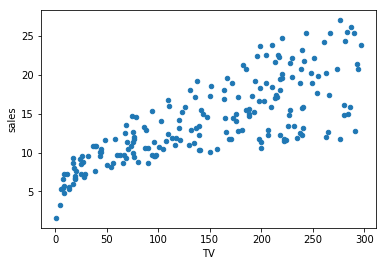

In [12]:
data.plot(kind = "scatter", x = "TV", y = "sales")

# Experiments and Hypothesis Testing 

## Main libraries for this are `statsmodels` and `Scipi `

### - `statsmodels` goes deeply into statistical tests
### - `scipi` is for scientific computing in python

In [3]:
# statistical testing is comparing different groups of data and determining if they are statistically similar or not

In [8]:
#Key terms: 
    #Hypothesis Testing
        #start with a Null Hypothesis (and the Alternative Hypothesis, the negation of the null)

        #null hypothesis assumes there is NO statistically significant difference between groups
            #then you check whether the data supports rejecting your null hypothesis or failing to reject null hypothesis

    #P-Values
        #how likely is the effect observed to be true, assumming the null hypothesis is true?
        #p-value is really the chance of incorrectly rejecting the null hypothesis

    #Confidence Intervals 
        #ex 95% confidence interval 

    #The Test Statistic
        #a standardized measure of communicating how far away you are from the group average
        #ex for normally distributed data, the test statistic is standard deviation 

    #Error Types
        #Type I Error ~ false positives: incorrectly rejecting a true null hypothesis 
            #in ML this is our model falsely predicting "positive"

        #Type II Error ~ false negative: incorretly retaining a false null hypothesis
            #in ML this is our model falsely predicting "negative"

In [11]:
#were the amounts spent on newspaper and radio ads significantly different from one another? 

# sm.stats.ztest() method performs a Z-test

tstat, pval = sm.stats.ztest(data["radio"], data["newspaper"])

In [12]:
tstat #this is the test statistic

-3.911403345381785

In [13]:
pval 

9.176137849809707e-05

In [19]:
1 - pval

0.9999082386215019

In [ ]:
#we are comparing two means, radio_mean and newspaper_mean

#3.911 allows us to say that we're 99% certain the 
#relationship between "radio" and "newspaper" is not due to random chance

#Z-test assumes that "radio" and "newspaper" are normally distributed

### `parametric tests` make an assumption about the underlying distribution of the data

# Inferring Normality 

In [ ]:
#subjective ways of inferring normality:
    #histograms
    #boxplots
    #qqplots (very useful for inferring distribution of your data visually)
    
#analytical tests:
    #shapiro-wilk test
    #kolmogorov-smirnov test

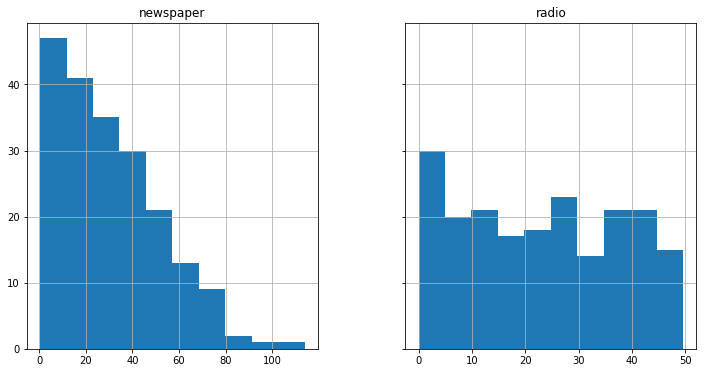

In [18]:
#subjective methods - looking at histograms
data[["radio", "newspaper"]].hist(sharey=True,figsize=(12,6))
plt.show() 

In [ ]:
# these two columns of data are clearly not normal upon visual inspection

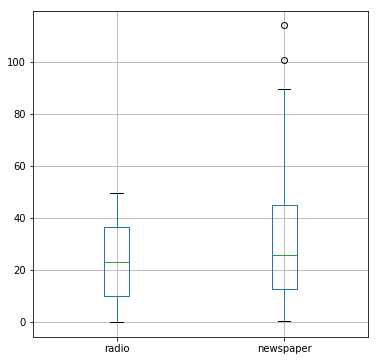

In [25]:
data[["radio", "newspaper"]].boxplot(figsize=(6,6))
plt.show()

## `qqplots` are most useful plot for thinking about normality

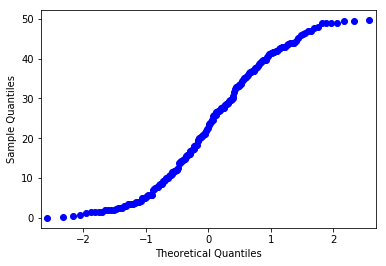

In [24]:
from statsmodels.graphics.gofplots import qqplot
x = qqplot(data["radio"])

In [ ]:
#qqplot tells you where your data begins to disagree with normality 
    #between 1/2 and 1 standard deviations away from the mean, the data adheres with normality
    #past this the, data becomes non-normal 

#if this plot is a straight line, the data is highly normally distributed

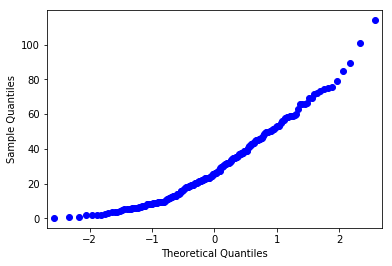

In [26]:
x = qqplot(data["newspaper"])

## Analytical tests for normality 

In [ ]:
#Shapiro Wilk test for normality (parametric test)

    #most commonly used test for normality
    #accuracy tapers off with sample sizes > 2000
    #also doesnt work well if there are many repeated values in the data
    
    #tests null hypothesis that the data is normal
    #returns a tstat and a pvalue 

In [27]:
import scipy as sp

In [28]:
shapiro_tstat, shapiro_pval = sp.stats.shapiro(data["radio"])

In [29]:
shapiro_tstat #shapiro test statistic 

0.9440046548843384

In [30]:
shapiro_pval #p-value 
#null hypothesis is that the data is normal
    #this very small p-value tells us this is definitely not normal
    
    #if we assume H, the pval is the chances the data in its current state is being generated by a normal process
        #(where H is the assumption that the data is normally distributed)
  
    #i.e. pval is the probability that the results were getting actually are normal    

5.196915822125447e-07

In [ ]:
#Kolmogorov-Smirnov (non-parametric test)

    #flexible test that can be used to test for adherence to ANY distribution
    #non-parametric tests works better for noiser data
    #more relaxed assumptions about the data, works better for larger sets
    #more conservative assignment of (larger) pvalues, thus harder to reject the null hypothesis
    #requires standardized data
    
    #how it works:
        #looks at a Q-Qplot, and measures the area between QQplot curve and the straight line
        
    #returns a tstat and a pvalue, testing the null hypothesis that the data follows a distribution of your choice

In [ ]:
#first standardize the radio data

In [32]:
radio_standardize = (data["radio"] - data["radio"].mean())/data["radio"].std()

In [33]:
radio_standardize.describe()

count    2.000000e+02
mean    -1.595946e-15
std      1.000000e+00
min     -1.566936e+00
25%     -8.950745e-01
50%     -2.451705e-02
75%      8.931886e-01
max      1.773849e+00
Name: radio, dtype: float64

In [53]:
#sp.stats.kstest() method -- note we set cdf = "norm" to test for normality

KS_tstat, KS_pval = sp.stats.kstest(radio_standardize, cdf="norm")

In [54]:
KS_tstat

0.08395825811656044

In [55]:
KS_pval

0.11261277203399489

In [45]:
newspaper_standardize = (data["newspaper"] - data["newspaper"].mean())/data["newspaper"].std()

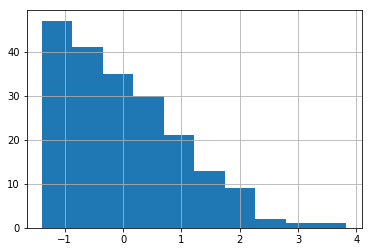

In [56]:
newspaper_standardize.hist()
plt.show()

In [46]:
#here we set cdf = "expon" to test if the data follows an exponential distribution
KS_tstat, KS_pval = sp.stats.kstest(newspaper_standardize, cdf="expon")

In [47]:
KS_tstat

0.56

In [48]:
KS_pval

0.0

In [ ]:
#General Rule:
#if our parametric test (Shapiro) tells us to reject normality, we can use this as a strong indicator that our data
    #is not normal
    #the non-parametric test will always be more conservative in telling us to reject normality
    
    #the KS test (non-parametric) is a good way to test and find which distribution fits your data

# Class Challenge: A/B Testing Hypothesis Tests

In [58]:
# Generate some data and randomize

In [59]:
# Some people bought nothing, the others bought with some distribution

data1 = [0] * 50
data1.extend(np.random.normal(14,4,150))
np.random.shuffle(data1)

In [63]:
#the second design hooked less people,
#but those that were hooked bought more stuff

data2 = [0] * 100
data2.extend(np.random.normal(20,5,100))
np.random.shuffle(data2)

In [68]:
#Make a dataframe
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head() #number of sales under version A of website vs number of sales under version B of website
          #each row represents a visit, entry represents a sale, (zero means no sale)

,A,B
0,14.880464,0.000000
1,0.000000,28.209828
2,16.551760,18.797178
3,11.373227,17.163586
4,18.730102,21.004541


In [ ]:
#Z-test
    #In the two independent samples application with a continuous outcome, 
    #the parameter of interest in the test of hypothesis is the difference in population means, μ1-μ2. 
    #The null hypothesis is always that there is no difference between groups with respect to means, i.e.,

    #i.e. H0: μ1-μ2 = 0

In [71]:
tstat, pval = sm.stats.ztest(df["A"], df["B"])

In [72]:
tstat

0.6153331971105462

In [73]:
pval #the pvalue being very high, tells us that we cannot reject the null hypothesis, even at the 10% level
     #i.e. there is likely no statistically significant difference between group A and B's means 

0.538334698344396

In [ ]:
#Subjective Tests for normality

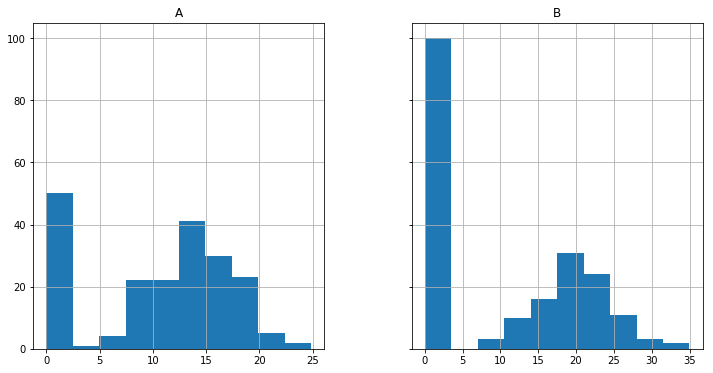

In [75]:
#generate histograms
df[["A","B"]].hist(sharey=True, figsize = (12,6))
plt.show() #almost normal, but huge peaks at 0 for those who did not buy skews normality

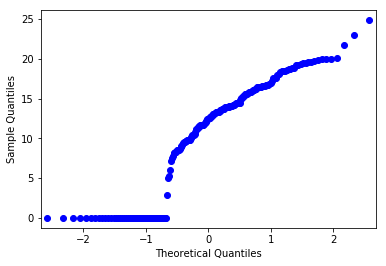

In [79]:
A = qqplot(data=df["A"]) #note the flatline at zero

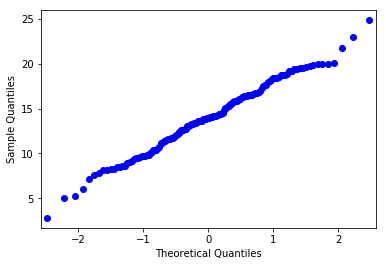

In [94]:
A = qqplot(data=df[df.A>0]["A"]) #Observe if we exclude the zeros from the A column
                                 #we get stronger indicators that the data is normal
    
#i.e. when people did actually make a sale, those sales were fairly normally distributed

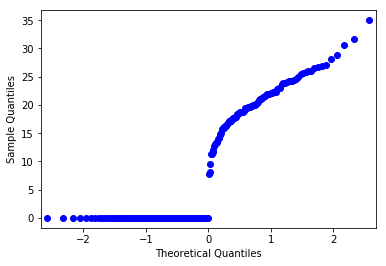

In [77]:
B = qqplot(data=df["B"])

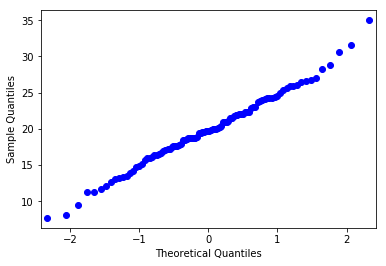

In [95]:
B = qqplot(data=df[df.B >0]["B"]) #for those rows that were actual sales

In [ ]:
#Analytical Tests for normality

In [ ]:
#Shapiro-Wilks test 

In [80]:
shapiro_tstat_A, shapiro_pval_A = sp.stats.shapiro(df["A"])

In [81]:
shapiro_tstat_A

0.8832598924636841

In [82]:
shapiro_pval_A #note this is very close to zero 
               #indicates that there is a very small chance that data column A is generated by a normal process

2.4420890656906558e-11

In [96]:
shapiro_tstat_A, shapiro_pval_A = sp.stats.shapiro(df[df.A>0]["A"]) #restricting to the sale rows of column A

In [97]:
shapiro_pval_A #note if we exclude the rows corresponding to no sale
               #we get a very high p-value, indicating the sales subset is very likely generated by a normal process

0.7372278571128845

In [83]:
shapiro_tstat_B, shapiro_pval_B = sp.stats.shapiro(df["B"])

In [84]:
shapiro_tstat_B

0.7909414768218994

In [85]:
shapiro_pval_B #note that this is also very close to zero
               #indicates that there is a very small chance that data column B is generated by a normal process

1.2357921650446991e-15

In [ ]:
#KS test 

In [86]:
A_standardize = (df["A"] - df["A"].mean())/df["A"].std()

In [87]:
KS_tstat_A, KS_pval_A = sp.stats.kstest(A_standardize, cdf="norm")

In [88]:
KS_tstat_A

0.18472229013820712

In [89]:
KS_pval_A 

1.9066839527237534e-06

In [90]:
B_standardize = (df["B"] - df["B"].mean())/df["B"].std()

In [91]:
KS_tstat_B, KS_pval_B = sp.stats.kstest(A_standardize, cdf="norm")

In [92]:
KS_tstat_B

0.18472229013820712

In [93]:
KS_pval_B

1.9066839527237534e-06

### many methods assume the underlying data generating process is normal

# Moving Beyond Normality 

In [ ]:
#Parametric Tests:
    #student t-test -- similar to the Z-test
    #ANOVA (analysis of variance) -- used to compare more than two groups

#non-Parametric Tests: good for noisy data where its unclear what the distribution is
#                      more conservative at assinging p-values
    #Mann-Whitney test -- an extension of the t-test
    #Kruskall-Wallis Test -- an extension of the ANOVA test

## t-test ~ parametric test

In [ ]:
#similar to a Z-test, but more flexible because it does not assume you know the population variance
    #(Z-test assumes you know the population variance)
    #in practice, you will use this far more than the Z-test 

#performs much better for small sample sizes
    #this is great for analyzing the predictive power of classifiers which have very small test sets

#standard way of evaluating regression results

### `sp.stats.ttest_ind()` Calculates the T-test for the means of TWO INDEPENDENT samples of scores.

In [98]:
#key is setting equal_var argument to False, equal_var = True performs a regular Z-test

test_stat, pval = sp.stats.ttest_ind(df["A"],df["B"], equal_var = False)

In [99]:
test_stat

0.6153331971105462

In [100]:
pval

0.5387420609458771

## ANOVA  ~ parametric test w/ a normality assumption

In [ ]:
#also used to compare means
#can be used to compare multiple groups
#uses the F-distribution (F-test stat) to perform calculations
    #essentially a comparison of variances

# The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
    # The samples are independent.
    # Each sample is from a normally distributed population.
    # The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [ ]:
#One way ANOVA:
    #most common: used for comparing means across 2 or more groups
    #Essentially an extension of the student t-test, makes no assumption about variance

In [ ]:
#Other types:
    #Factorial ANOVA ~ alot like regular regression 
        #compare means subject to different categorical variables
        #i.e. a comparison of means across groups, where each group can be partitioned across a category
        
    #Repeated Measures ANOVA ~ When a certain group of people does the same thing over
    #    and over again, are the results significantly different?
    #useful for clinical trials

### `sp.stats.f_oneway()` method allows us to run a one way ANOVA

In [101]:
fstat, pval = sp.stats.f_oneway(data["TV"],data["radio"],data["newspaper"])

In [102]:
fstat

358.8514595342597

In [103]:
pval #note this is very close to zero

     #tells us we can strongly reject the null-hypothesis (at even a 1% significant level)
     #where the null-hypothesis is that the averages between groups are similar
     
     #i.e. its very likely the group averages are not the same at all 
     ##this company spent very different amounts of money across the groups 

4.552931539744962e-103

In [107]:
1 - pval #with almost 100% confidence we can say the spending across the 3 channels was different

1.0

## Kruskal-Wallis Test  ~ non-parametric version of ANOVA

In [ ]:
#Parametric tests are more accurate when fitted to appropriate data
    #more error prone when the data is noisy
    
#K-W is more relaxed in its assumptions about statistical properties of underlying data

### `sp.stats.kruskal()` method allows us to run a K-W Test

In [104]:
fstat, pval = sp.stats.kruskal(data["TV"],data["radio"],data["newspaper"])

In [105]:
fstat

257.66637166931656

In [106]:
pval #again note the more conservative (higher) p_value than what is returned by the parametric ANOVA test

1.1180424828789922e-56

## Statistical Significance vs Statistical Importance

In [ ]:
# i.e. should you always care about statistically significant pvalues? 

In [ ]:
# note that the larger n, the smaller differnce in means you need between groups to get a statistically
    #significant result from your t-test

#but what if our difference between means is so small than in practice we don't care?

In [ ]:
#pvalues are very dependent on the size of your sample
    #the bigger your sample size is, the smaller the difference in means you need to get a statistically 
        #significant result (i.e. pvalues less than .05)

### `Effect Size` ~ A scale independent way of comparing values 

In [ ]:
# a way of comparing difference between groups which is scale independent
# this is very useful for reporting alongside a p-value because they often communicate different things

#effect size is reported in standard deviations

#Downer: effect size is not usually reported in python statistics libraries

### Most commonly used measure for effect size: `Cohen's D`

In [ ]:
# exercise: write a function which calculates the Cohen's D

#Cohen's D = (group_1.mean() - group_2.mean()) / pooled_groups.std()

#look up formula for pooled standard deviation for two groups
